In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model

In [5]:
# Reading the data file
bmart_ds = pd.read_csv('BigMart.csv')
bmart_ds

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [6]:
bmart_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
# Checking the column names of the dataset
bmart_ds.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
# Checking the data types of the dataset
bmart_ds.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
# Checking the null values of the dataset
bmart_ds.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

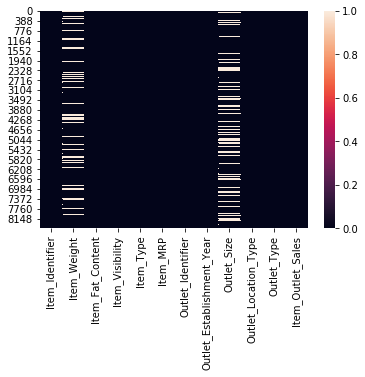

In [10]:
# Plotting the heatmap if null values are present
sns.heatmap(bmart_ds.isnull())

In [11]:
# Statistical analysis
bmart_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
bmart_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


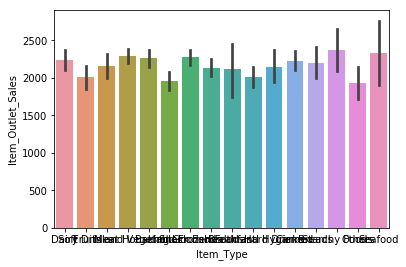

In [13]:
# Visualization between 'Item_Type' and 'Item_Outlet_Sales', how 'Item_Outlet_Sales' vary with 'Item Type'
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=bmart_ds)
plt.show()

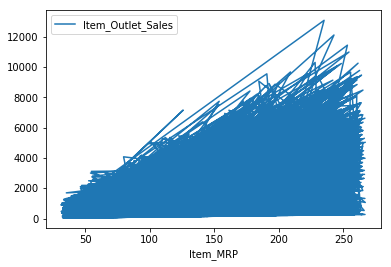

In [14]:
# LinePlot shows visualization between 'Item_MRP' and 'Item_Outlet_Sales'
.plot(kind='line', x='Item_MRP', y='Item_Outlet_Sales')
plt.show()

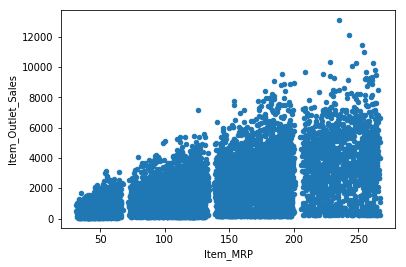

In [15]:
# Scatterplot : how 'Item MRP' varies with 'Item_Outlet_Sales'
bmart_ds.plot(kind='scatter', x='Item_MRP', y='Item_Outlet_Sales')
plt.show()

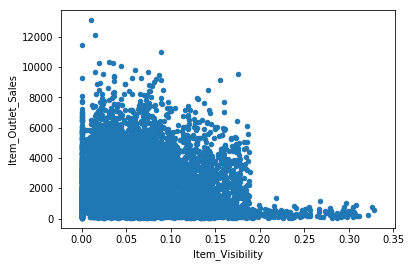

In [16]:
# 'Item Visibility' also affects the 'Item Outlet Sales', this graph shows this
bmart_ds.plot(kind='scatter', x='Item_Visibility', y='Item_Outlet_Sales')
plt.show()

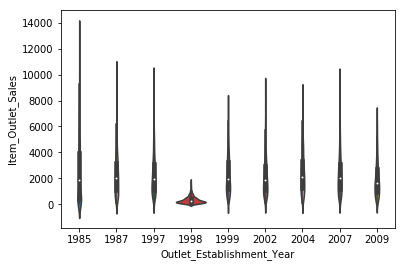

In [17]:
# ViolinPlot show where are the maximum 'Item Outlet Sales' lies wrt 'Outlet Establishment Year'
sns.violinplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=bmart_ds)
plt.show()

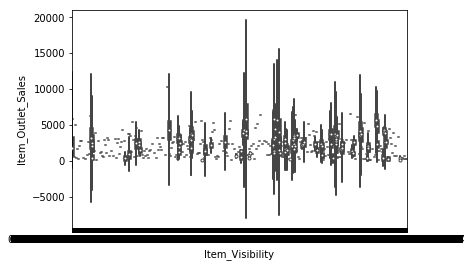

In [18]:
# This graph shows 'Item Outlet Sales' with Item Visibility
sns.violinplot(x='Item_Visibility', y='Item_Outlet_Sales', data=bmart_ds)
plt.show()

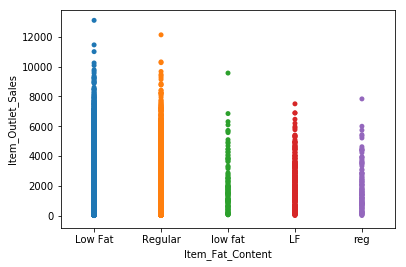

In [19]:
# Stripplot shows how 'Item output sales' vary with 'fat content'
sns.stripplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=bmart_ds)
plt.show()

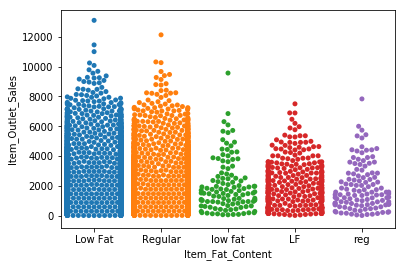

In [20]:
# Swarmplot shows the 'Item outlet sales' wrt 'Item fat content'
sns.swarmplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=bmart_ds)
plt.show()

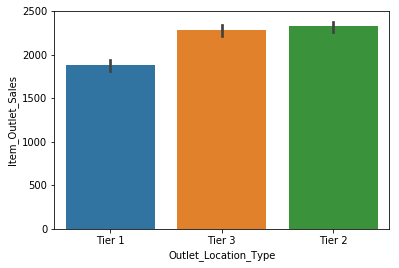

In [21]:
# Barplot shows the sales of each 'Outlet location type'
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=bmart_ds)
plt.show()

In [22]:
# Correlation between different features of the bigmart dataset
bmart_ds.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


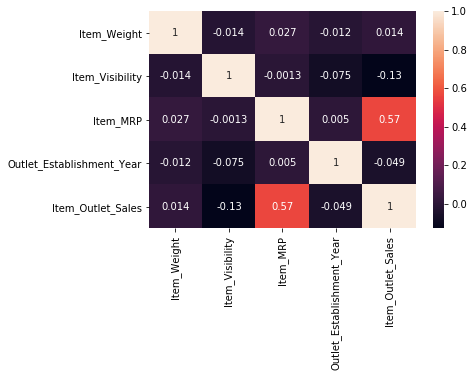

In [23]:
# heatmap dataset which shows the correaltion between diffrent features iof the dataset
sns.heatmap(bmart_ds.corr(), annot=True)
plt.show()

In [24]:
# Statistical analysis of bigmart dataset
bmart_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


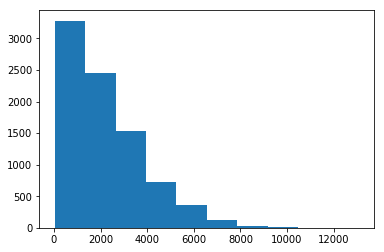

In [25]:
# Histogram for 'Item out;et sale': Shows the frequency of the 'Item Outlet Sales'
plt.hist(bmart_ds['Item_Outlet_Sales'])
plt.show()

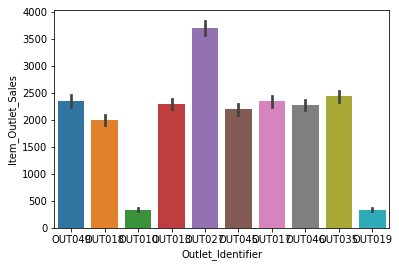

In [26]:
# This barplot shows how Sales affected by the different 'Outlets'
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=bmart_ds)
plt.show()

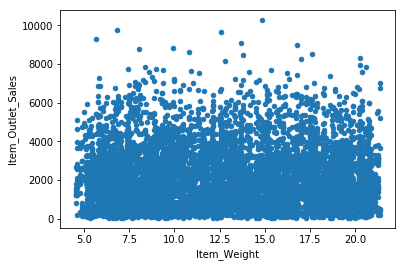

In [27]:
# 'Item Weight', also affects the 'Item Outlet Sales'
bmart_ds.plot(kind='scatter', x='Item_Weight', y='Item_Outlet_Sales')
plt.show()

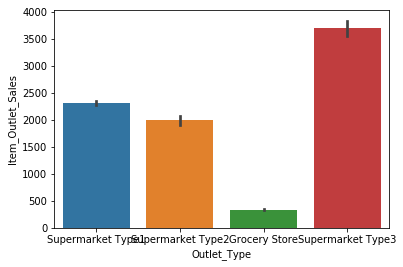

In [29]:
# 'Outlet type' also affects the 'Item Outlet Sales'
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=bmart_ds)
plt.show()

In [30]:
# Checking the skewness of the data
bmart_ds.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [31]:
# Chceking if null values are present in gthe dataset
bmart_ds.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [32]:
bmart_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
# Replacing the missing values
bmart_ds['Item_Weight'] = bmart_ds['Item_Weight'].replace(np.NaN, bmart_ds['Item_Weight'].mean())

In [34]:
bmart_ds['Outlet_Size'] = bmart_ds['Outlet_Size'].fillna(bmart_ds['Outlet_Size'].mode()[0])


In [35]:
# Checking the sum of null values
bmart_ds.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [36]:
bmart_ds.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [37]:
bmart_ds.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [38]:
#Checking the non numerical data to numerical data
le = LabelEncoder()
arr = [ 'Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for val in arr:
    bmart_ds[val] = bmart_ds[val]. astype(str)
    bmart_ds[val] = le.fit_transform(bmart_ds[val])

In [39]:
bmart_ds.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [40]:
bmart_ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [41]:
bmart_ds.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

In [42]:
# As skewness is present, so removing skewness again
for i in range (1, 21):
    # Remove skewness 
    for col in bmart_ds.columns:
        if bmart_ds.skew().loc[col] > 0.55:
            bmart_ds[col] = np.log1p(bmart_ds[col])


In [43]:
bmart_ds.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content            -0.332843
Item_Visibility              0.538437
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                 -0.236040
Item_Outlet_Sales           -0.882266
dtype: float64

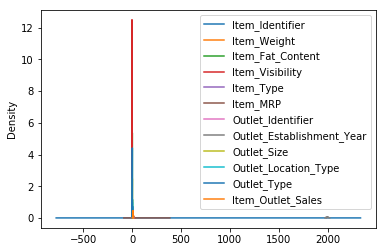

In [44]:
# density plot for bigmart dataset
bmart_ds.plot.density()
plt.show()

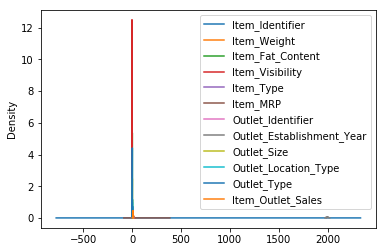

In [45]:
bmart_ds.plot.kde()
plt.show()

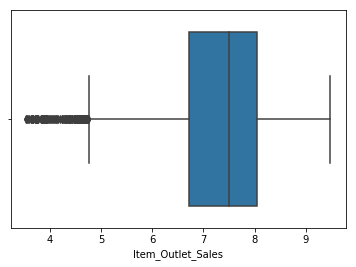

In [46]:
# boxplot to check the outliers of 'Item Output Sales'
sns.boxplot(bmart_ds['Item_Outlet_Sales'])
plt.show()

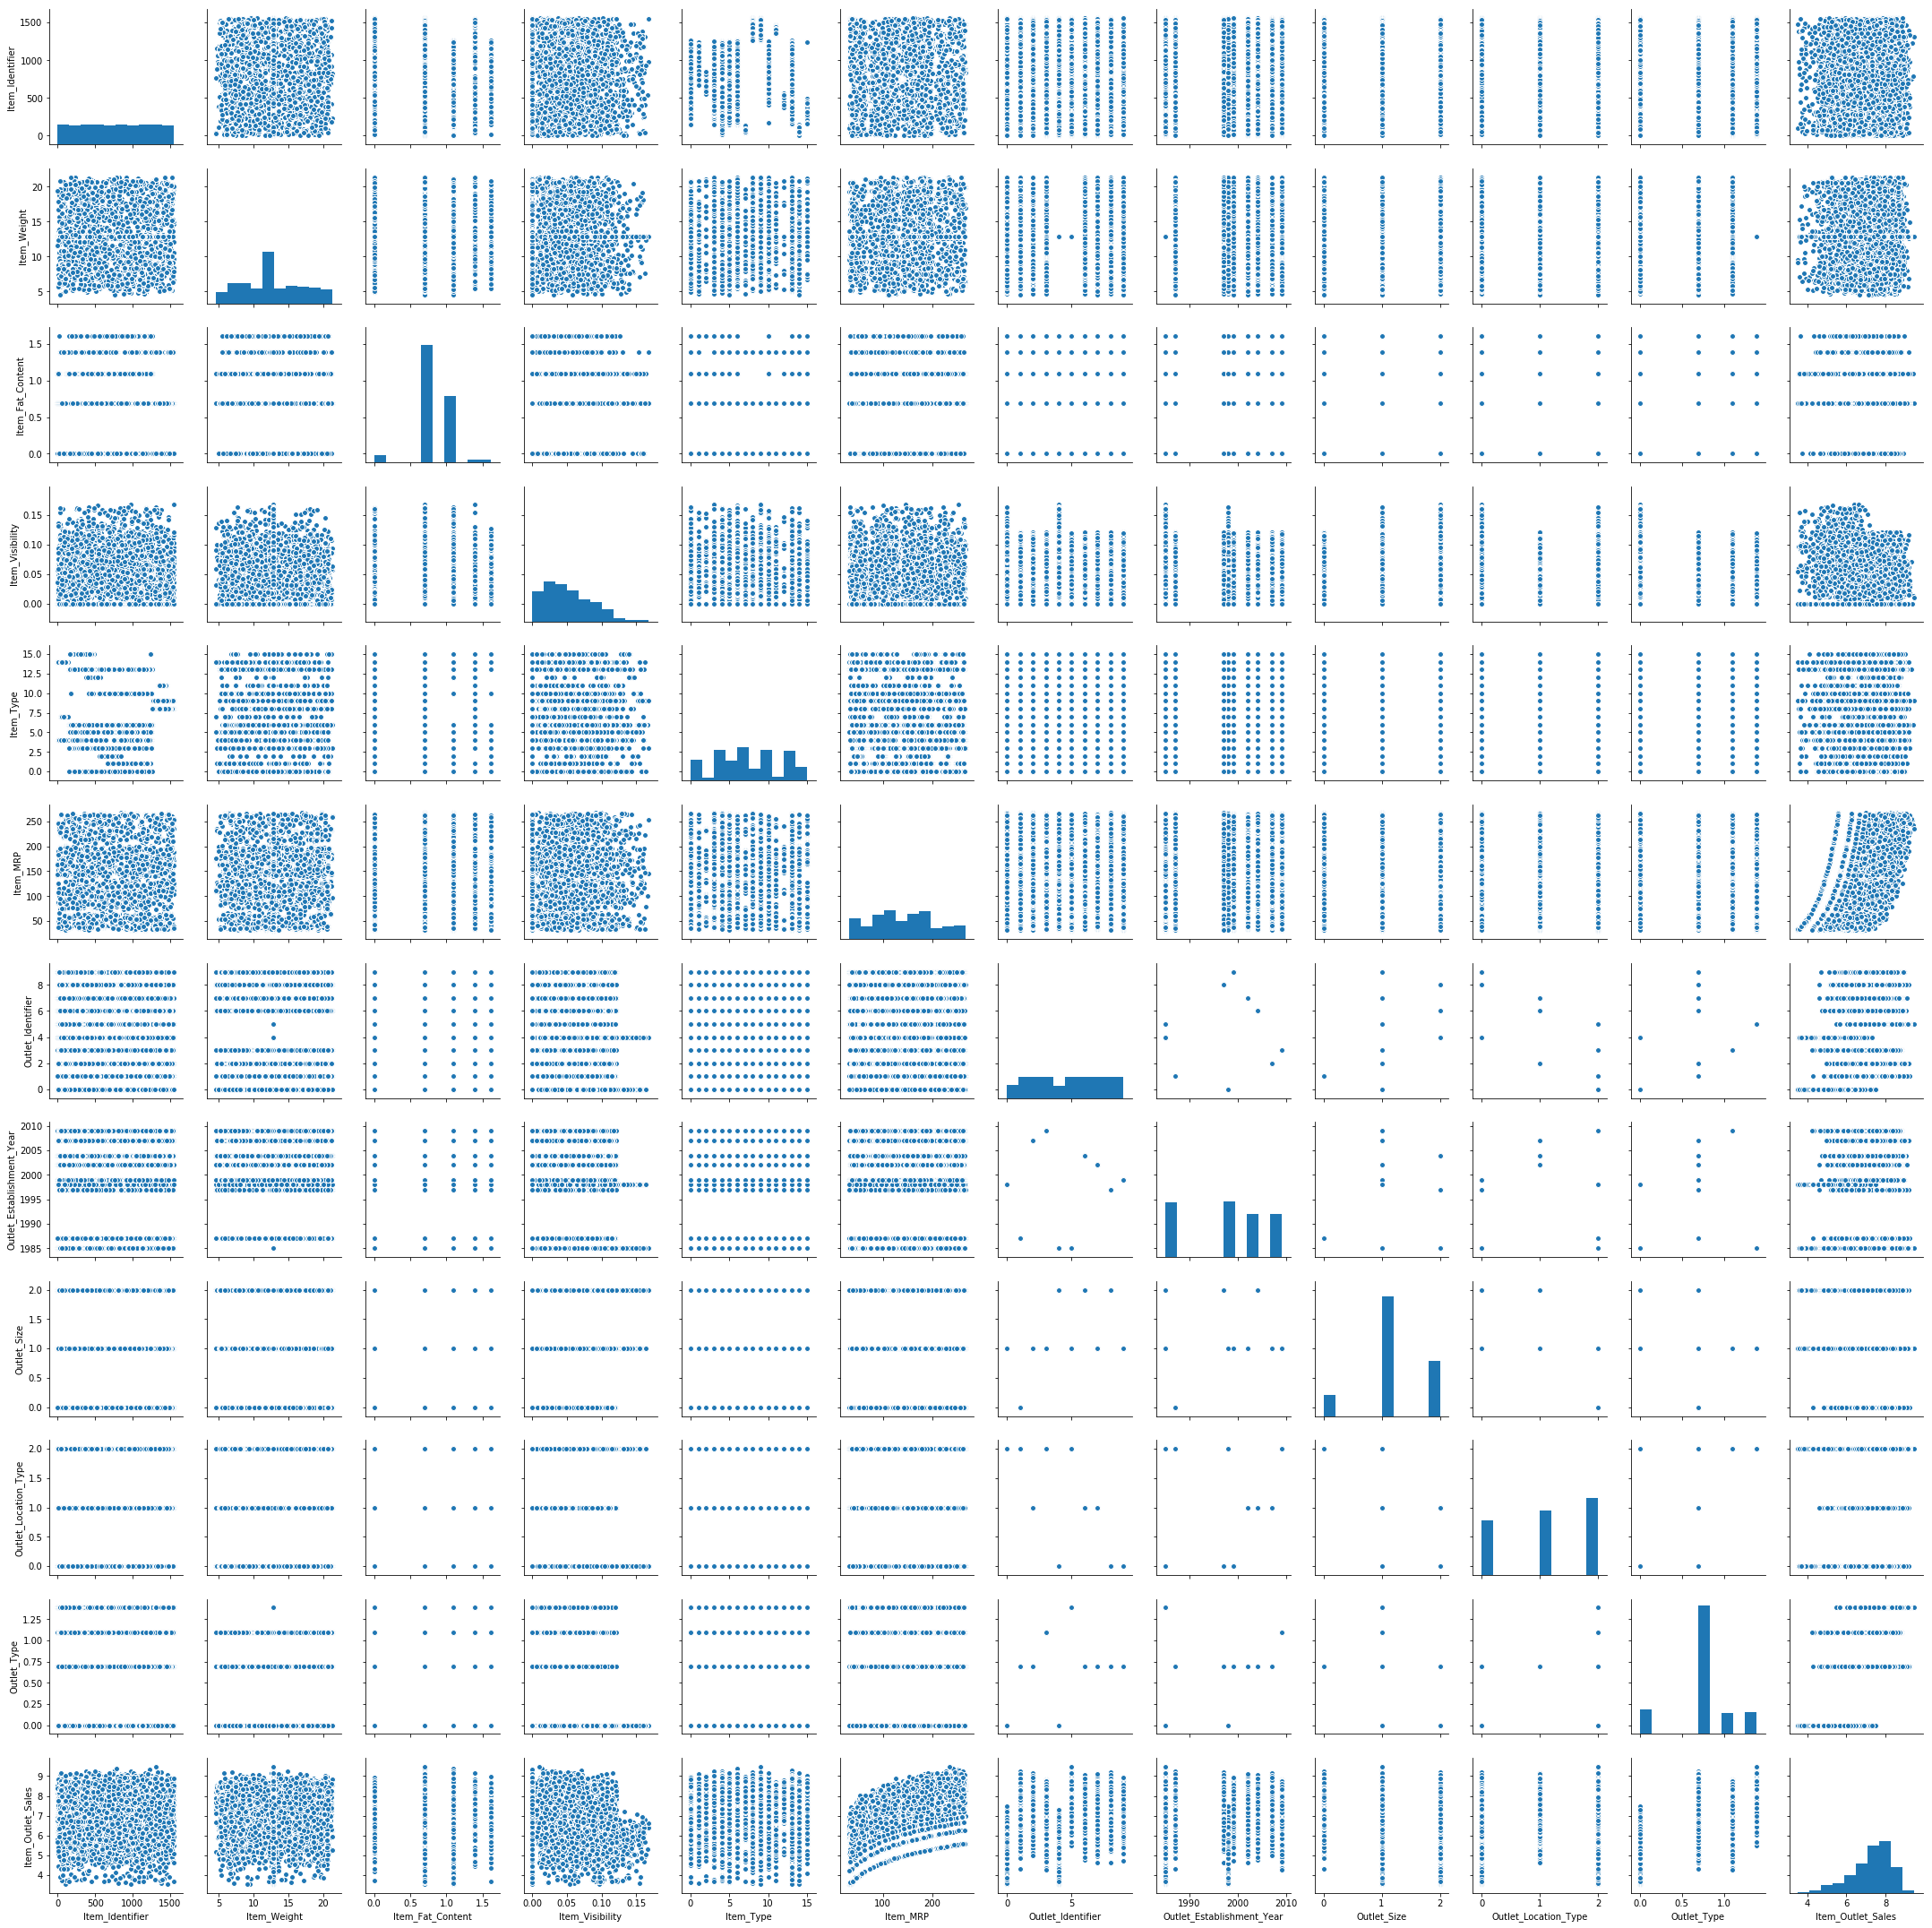

In [47]:
# pairplot among various features oiof the dataset
sns.pairplot(bmart_ds)
plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


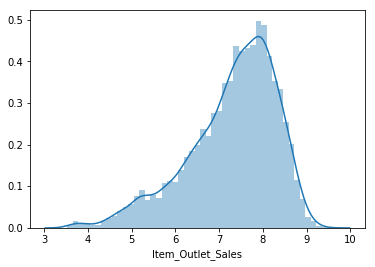

In [48]:
# Distribution plot for 'Item Outlet Sales'
sns.distplot(bmart_ds['Item_Outlet_Sales'])
plt.show()

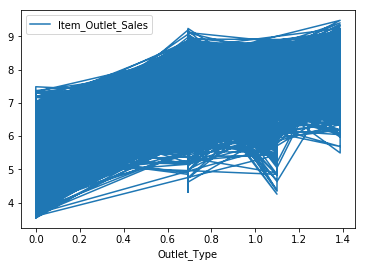

In [50]:
# region wise 'Item_Outlet_Sales' Visualization
bmart_ds.plot(kind='line', x='Outlet_Type', y='Item_Outlet_Sales')
plt.show()

In [64]:
bmart_ds.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content            -0.332843
Item_Visibility              0.538437
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                 -0.236040
Item_Outlet_Sales           -0.882266
dtype: float64

In [65]:
# CHecking the 'z score' / outliers of the dataset, if presnt, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(bmart_ds))
print ('Before removing zscore: ', bmart_ds.shape)

bmart_ds_final = bmart_ds.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", bmart_ds_final.shape)

Before removing zscore:  (8523, 12)
After removing zscore:  (8115, 12)


In [66]:
# Assigning the input and output data
df_x = bmart_ds_final.drop(columns = ['Item_Outlet_Sales'])
y = bmart_ds_final['Item_Outlet_Sales']


In [53]:
df_x.shape

(8115, 11)

In [67]:
y.shape

(8115,)

In [55]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [69]:
# Subroutine to get the best random state with max r2_score
max_r2_score = 0
for r_state in range (42, 100):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)
    
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test, y_pred)
    
    
    print ("\nr2 score corresponding to state: ", r_state, " is: ", r2_scr)
    if (r2_scr > max_r2_score):
        max_r2_score = r2_scr
        final_r_state = r_state
print ("\nMax r2 score corresponding to ", final_r_state, " is: ", max_r2_score)



r2 score corresponding to state:  42  is:  0.6254466983795886

r2 score corresponding to state:  43  is:  0.6238918854558406

r2 score corresponding to state:  44  is:  0.635007495519562

r2 score corresponding to state:  45  is:  0.6327316181245022

r2 score corresponding to state:  46  is:  0.6345096493122735

r2 score corresponding to state:  47  is:  0.6095414382629836

r2 score corresponding to state:  48  is:  0.6426135909133137

r2 score corresponding to state:  49  is:  0.6149089452631619

r2 score corresponding to state:  50  is:  0.6189812435020193

r2 score corresponding to state:  51  is:  0.6219591204989303

r2 score corresponding to state:  52  is:  0.6163117881893776

r2 score corresponding to state:  53  is:  0.6141125594286361

r2 score corresponding to state:  54  is:  0.6182895798773185

r2 score corresponding to state:  55  is:  0.6231148470067547

r2 score corresponding to state:  56  is:  0.5996370776627346

r2 score corresponding to state:  57  is:  0.6481551240

In [70]:
# Further chceking with cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), x, y, cv=5, scoring="r2").mean()

0.6195730746420356

In [73]:
# Applying the algorithm with best random state
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=57, test_size=.20)
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [74]:
# Evaluate r2_score and RMSE
print("\n r2 score is: ", r2_score(y_test, y_pred))
print("\n RMSE is: ", np.sqrt(mean_squared_error(y_test, y_pred)))


 r2 score is:  0.6481551240204912

 RMSE is:  0.5789055405461089


In [75]:
# Regularization: Using Lasso Regression
# GridSerachCV : to use the best parameters and best model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param = {'alpha': [0.1, 0.001, 0.0001, 1.0]}

grid = GridSearchCV(estimator = Lasso(), param_grid = param, scoring='r2')
d_mod = grid.fit(x,y)
print ("\n Best Params ", grid.best_params_)
print ("\n Best Score ", grid.best_score_)



 Best Params  {'alpha': 0.001}

 Best Score  0.6198277947099491


In [76]:
# Using lasso for Regularization, to remove variance and biasedness

ls = Lasso(alpha = 0.001, normalize=True)

print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

ls.fit(x_train, y_train)
print ("\n Predicted value: ", ls.predict(x_test))
ls_pred = ls.predict(x_test)

print ("\n Score: ", ls.score(x_train, y_train))
print ("\n Coef: ", ls.coef_)
print ("\n Intercept: ", ls.intercept_)

#plt.bar (x, ls.coef_)
#plt.show()
ls.coef_.shape

(6492, 11)
(6492,)
(1623, 11)
(1623,)

 Predicted value:  [7.96478882 7.12460975 8.1563827  ... 8.18222284 8.49560933 6.80628355]

 Score:  0.5675382517622094

 Coef:  [ 0.         -0.          0.         -0.          0.          0.41287998
  0.08534496  0.         -0.         -0.          0.44745443]

 Intercept:  7.326890465584116


(11,)

In [78]:
from sklearn.externals import joblib
joblib.dump(lr, 'Prj_BigMart.pkl')
clf = joblib.load('Prj_BigMart.pkl')
clf.predict(x_test)

array([8.28831031, 7.37811346, 8.4246059 , ..., 8.20047145, 8.67870992,
       6.76007692])